In [2]:
print("merhaba")

merhaba


In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [5]:
dataframe=pd.read_csv("data/US-pumpkins.csv")

In [106]:
dataframe.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [107]:
dataframe.isna().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [108]:
dataframe.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [109]:
dataframe.dropna(axis=1,inplace=True)

In [110]:
dataframe.head()

,City Name,Package,Date,Low Price,High Price,Repack
0,BALTIMORE,24 inch bins,4/29/17,270.0,280.0,E
1,BALTIMORE,24 inch bins,5/6/17,270.0,280.0,E
2,BALTIMORE,24 inch bins,9/24/16,160.0,160.0,N
3,BALTIMORE,24 inch bins,9/24/16,160.0,160.0,N
4,BALTIMORE,24 inch bins,11/5/16,90.0,100.0,N


In [111]:
price=(dataframe["Low Price"] + dataframe["High Price"] )/2

In [112]:
price

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64

In [113]:
price.set_axis="price"

In [114]:
price

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64

In [115]:
price.head()

0    275.0
1    275.0
2    160.0
3    160.0
4     95.0
dtype: float64

In [116]:
price =price.to_frame()

In [117]:
price

,0
0,275.00
1,275.00
2,160.00
3,160.00
4,95.00
...,...
1752,14.75
1753,275.00
1754,275.00
1755,275.00


In [118]:
price.head()

,0
0,275.0
1,275.0
2,160.0
3,160.0
4,95.0


In [119]:
price[0]

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Name: 0, Length: 1757, dtype: float64

In [120]:
price.rename(columns={0:"price"},inplace=True)

In [121]:
price.head()

,price
0,275.0
1,275.0
2,160.0
3,160.0
4,95.0


In [122]:
dataframe

,City Name,Package,Date,Low Price,High Price,Repack
0,BALTIMORE,24 inch bins,4/29/17,270.00,280.00,E
1,BALTIMORE,24 inch bins,5/6/17,270.00,280.00,E
2,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N
3,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N
4,BALTIMORE,24 inch bins,11/5/16,90.00,100.00,N
...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,9/30/16,14.75,14.75,N
1753,ST. LOUIS,36 inch bins,9/26/16,275.00,275.00,N
1754,ST. LOUIS,36 inch bins,9/27/16,275.00,275.00,N
1755,ST. LOUIS,36 inch bins,9/28/16,275.00,275.00,N


In [123]:
dataframe=dataframe.join(price)

In [124]:
dataframe

,City Name,Package,Date,Low Price,High Price,Repack,price
0,BALTIMORE,24 inch bins,4/29/17,270.00,280.00,E,275.00
1,BALTIMORE,24 inch bins,5/6/17,270.00,280.00,E,275.00
2,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N,160.00
3,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N,160.00
4,BALTIMORE,24 inch bins,11/5/16,90.00,100.00,N,95.00
...,...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,9/30/16,14.75,14.75,N,14.75
1753,ST. LOUIS,36 inch bins,9/26/16,275.00,275.00,N,275.00
1754,ST. LOUIS,36 inch bins,9/27/16,275.00,275.00,N,275.00
1755,ST. LOUIS,36 inch bins,9/28/16,275.00,275.00,N,275.00


In [125]:
dataframe

,City Name,Package,Date,Low Price,High Price,Repack,price
0,BALTIMORE,24 inch bins,4/29/17,270.00,280.00,E,275.00
1,BALTIMORE,24 inch bins,5/6/17,270.00,280.00,E,275.00
2,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N,160.00
3,BALTIMORE,24 inch bins,9/24/16,160.00,160.00,N,160.00
4,BALTIMORE,24 inch bins,11/5/16,90.00,100.00,N,95.00
...,...,...,...,...,...,...,...
1752,ST. LOUIS,22 lb cartons,9/30/16,14.75,14.75,N,14.75
1753,ST. LOUIS,36 inch bins,9/26/16,275.00,275.00,N,275.00
1754,ST. LOUIS,36 inch bins,9/27/16,275.00,275.00,N,275.00
1755,ST. LOUIS,36 inch bins,9/28/16,275.00,275.00,N,275.00


In [126]:
dataframe.drop(columns="City Name",inplace=True)

In [127]:
dataframe


,Package,Date,Low Price,High Price,Repack,price
0,24 inch bins,4/29/17,270.00,280.00,E,275.00
1,24 inch bins,5/6/17,270.00,280.00,E,275.00
2,24 inch bins,9/24/16,160.00,160.00,N,160.00
3,24 inch bins,9/24/16,160.00,160.00,N,160.00
4,24 inch bins,11/5/16,90.00,100.00,N,95.00
...,...,...,...,...,...,...
1752,22 lb cartons,9/30/16,14.75,14.75,N,14.75
1753,36 inch bins,9/26/16,275.00,275.00,N,275.00
1754,36 inch bins,9/27/16,275.00,275.00,N,275.00
1755,36 inch bins,9/28/16,275.00,275.00,N,275.00


In [128]:
month = pd.DatetimeIndex(dataframe['Date']).month

In [129]:
month

Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)

In [134]:
dataframe["Date"]=month

In [135]:
dataframe

,Package,Date,Low Price,High Price,Repack,price
0,24 inch bins,4,270.00,280.00,E,275.00
1,24 inch bins,5,270.00,280.00,E,275.00
2,24 inch bins,9,160.00,160.00,N,160.00
3,24 inch bins,9,160.00,160.00,N,160.00
4,24 inch bins,11,90.00,100.00,N,95.00
...,...,...,...,...,...,...
1752,22 lb cartons,9,14.75,14.75,N,14.75
1753,36 inch bins,9,275.00,275.00,N,275.00
1754,36 inch bins,9,275.00,275.00,N,275.00
1755,36 inch bins,9,275.00,275.00,N,275.00


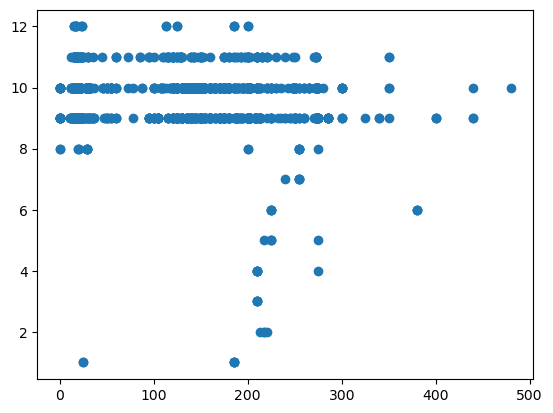

In [140]:
import matplotlib.pyplot as plt
price = dataframe.price
month = dataframe.Date
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

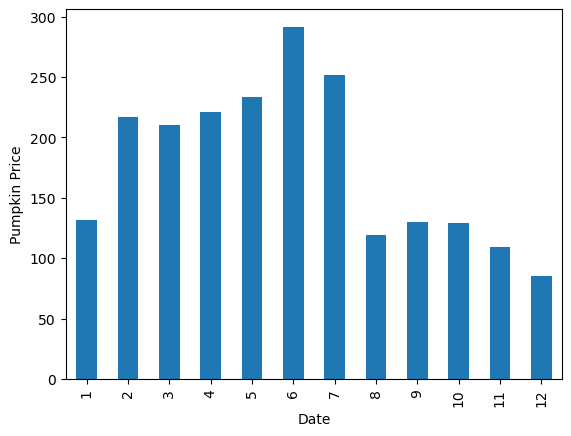

In [144]:
dataframe.groupby(['Date'])['price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [162]:
lin_reg=LinearRegression()
x=dataframe["Date"].values.reshape(-1,1)
y=dataframe["price"].values

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [173]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [174]:
y_pred=lin_reg.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean error: 86.2 (67.3%)


In [175]:
score = lin_reg.score(x_train,y_train)
print('Model determination: ', score)

Model determination:  0.019581765960088537
